In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

In [19]:
def instantaneous_slope(y, x):
    slope = np.zeros(len(x))
    for i in range(len(x)):
        if i == 0:
            slope[0] = (y[1] - y[0]) / (x[1] - x[0])
        elif i == len(x) - 1:
            slope[-1] = (y[-1] - y[-2]) / (x[-1] - x[-2])
        else:
#             slope[i] = (y[i+1] - y[i-1]) / (x[i+1] - x[i-1])
#             slope[i] = (y[i] - y[i-1]) / (x[i] - x[i-1])
            xp = x[i+1]
            xc = x[i]
            xm = x[i-1]
            yp = y[i+1]
            yc = y[i]
            ym = y[i-1]
            X = np.array([[xp ** 2, xp , 1], [xc **2, xc, 1], [xm ** 2, xm, 1]])
            B = np.array([yp, yc, ym])
            a = np.linalg.solve(X, B)
            slope[i] = 2 * a[0] * xc + a[1]
    return slope

In [2]:
path_to_results = '/home/ng213/pazy_code/pazy-aepw3-results/01_Bending/'
output_figures_folder = '../figures_aiaaj/'

In [3]:
bending_results = {}
bending_results['sharpy_w_skin'] = {'file': path_to_results + '/bending_sharpy_w_skin.txt',
                                    'skin': True,
                                    'marker': 'o',
                                    's': 4,
                                   'label':'SHARPy', 'linestyle': {'markevery': 5}}
bending_results['sharpy_wo_skin'] = {'file': path_to_results + '//bending_sharpy_wo_skin.txt',
                                     'skin': False,
                                     'marker': 'o',
                                     's': 4,
                                    'label': 'SHARPy', 'linestyle': {'markevery': 5}}
# bending_results['um_w_skin'] = {'file': path_to_results + '/bending_UMNAST_w_skin.txt',
#                                     'skin': True,
#                                     'marker': 's',
#                                     's': 4,
#                                    'label':'UM/NAST', 'linestyle': {'markevery': 5}}
# bending_results['um_wo_skin'] = {'file': path_to_results + '/bending_UMNAST_wo_skin.txt',
#                                      'skin': False,
#                                      'marker': 's',
#                                      's': 4,
#                                     'label': 'UM/NAST', 'linestyle': {'markevery': 5}}
bending_results['technion_mrm_w_skin'] = {'file': path_to_results + '/bending_mrm_umbeam_w_skin.txt',
                                          'skin': True,
                                          'marker': '^',
                                          's': 4,
                                         'label': 'MRM',}
bending_results['technion_mrm_wo_skin'] = {'file': path_to_results + '/bending_mrm_umbeam_wo_skin.txt',
                                           'marker': '^',
                                           's': 4,
                                           'skin': False,
                                          'label': 'MRM'}

# bending_results['nastran'] = {'file': path_to_results + '/bending_UMNAST_parentFEM_wo_skin.txt',
#                              'skin': False,
#                              'marker': '+',
#                              's': 4,
#                              'ls': 'none',
#                             'label': 'Nastran FEM',
#                              'linestyle': {'markevery': 1}}
bending_results['technion_experimental_w_skin'] = {'file': path_to_results + '/bending_technion_experimental_w_skin.txt',
                                            'skin': True,
                                           'label': 'Experimental',
                                           'marker': 'x',
                                            's': 4,
                                            'ls':'none'
                                           }
bending_results['technion_experimental_wo_skin'] = {'file': path_to_results + '/bending_technion_experimental_wo_skin.txt',
                                            'skin': False,
                                           'label': 'Experimental',
                                           'marker': 'x',
                                            's': 4,
                                            'ls':'none'
                                           }

In [4]:
load_linear_limit = 1  #kg
for key, case in bending_results.items():
    case['data'] = np.loadtxt(case['file'])
    if case['label'] == 'Technion Experimental':
        x = case['data'][case['data'][:, 0] < load_linear_limit, 0][1:]
        order = np.argsort(x)
        x = x[order]
        y = case['data'][case['data'][:, 0] < load_linear_limit, 1][1:]
        y = y[order]
        
    else:
        x = case['data'][case['data'][:, 0] < load_linear_limit, 0]
        y = case['data'][case['data'][:, 0] < load_linear_limit, 1]
    case['linear'] = stats.linregress(x, y)

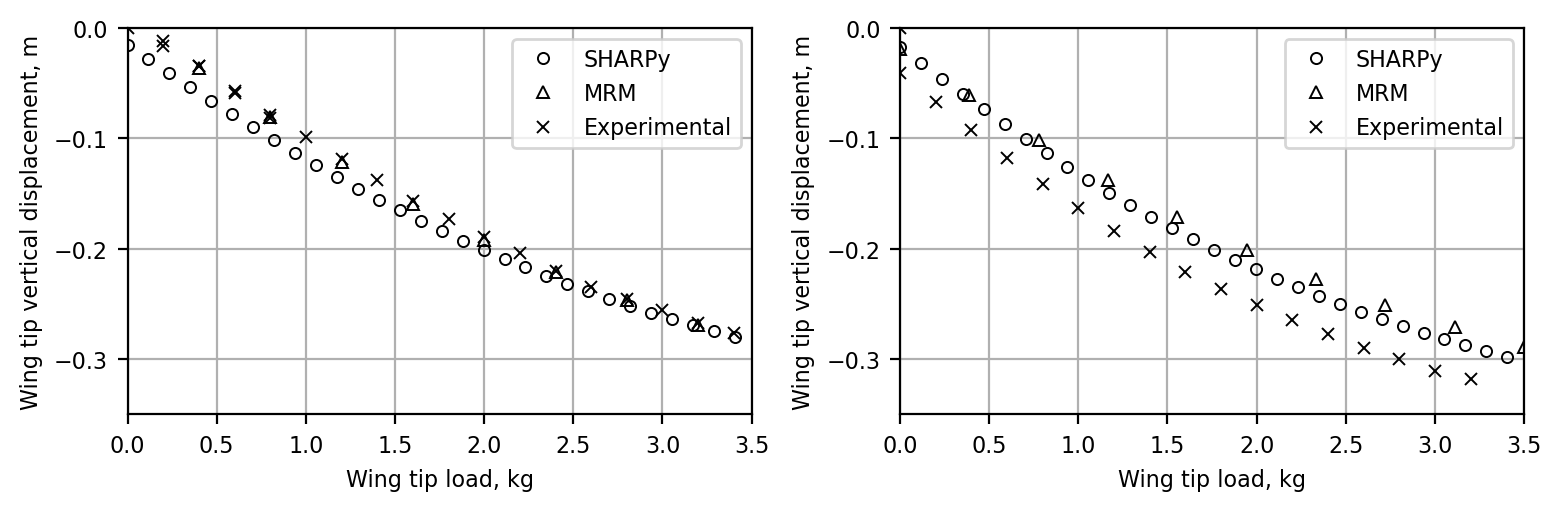

In [15]:
cm2in = 1/2.54
ar = 1.57
ar = 3
width_cm = 20

figsize = (width_cm * cm2in, width_cm / ar * cm2in)
fig, ax = plt.subplots(ncols=2, figsize=figsize)

for case in bending_results.values():
    if case['skin']:
        a = ax[0]
    else:
        a = ax[1]    
    
    if case['marker'] == '+':
        mfc = 'k'
    else:
        mfc = 'none'
    a.plot(case['data'][:, 0], case['data'][:, 1], label=case['label'], marker=case['marker'], ms=case['s'], markeredgecolor='k', mfc=mfc, ls='none', 
           lw=0.5, color='k', markeredgewidth=0.7,
           **case.get('linestyle', {}))

for a in ax:
    a.legend(fontsize=8)
    a.set_xlabel('Wing tip load, kg')
    a.set_ylabel('Wing tip vertical displacement, m')
    a.grid()
    a.set_xlim(0, 3.5)
    a.set_ylim(-0.35, 0.)

    for item in ([a.title, a.xaxis.label, a.yaxis.label] +
             a.get_xticklabels() + a.get_yticklabels()):
        item.set_fontsize(8)

plt.tight_layout()
plt.savefig(output_figures_folder + '02_Bending.pdf')

In [6]:
print('Skin on')
for k, case in bending_results.items():
    if case['skin']:
        print('{:20s}\tslope = {:.2f} cm/kg \t intercept = {:.2f} cm'.format(k, case['linear'].slope * 100, case['linear'].intercept * 100))
    
print('\nSkin off')
for k, case in bending_results.items():
    if not case['skin']:
        print('{:20s}\tslope = {:.2f} cm/kg \t intercept = {:.2f} cm'.format(k, case['linear'].slope * 100, case['linear'].intercept * 100))

Skin on
sharpy_w_skin       	slope = -10.35 cm/kg 	 intercept = -1.67 cm
technion_mrm_w_skin 	slope = -11.23 cm/kg 	 intercept = 0.90 cm
technion_experimental_w_skin	slope = -10.72 cm/kg 	 intercept = 0.67 cm

Skin off
sharpy_wo_skin      	slope = -11.46 cm/kg 	 intercept = -1.90 cm
technion_mrm_wo_skin	slope = -10.57 cm/kg 	 intercept = -1.91 cm
technion_experimental_wo_skin	slope = -15.22 cm/kg 	 intercept = -2.58 cm


# Slope at each point

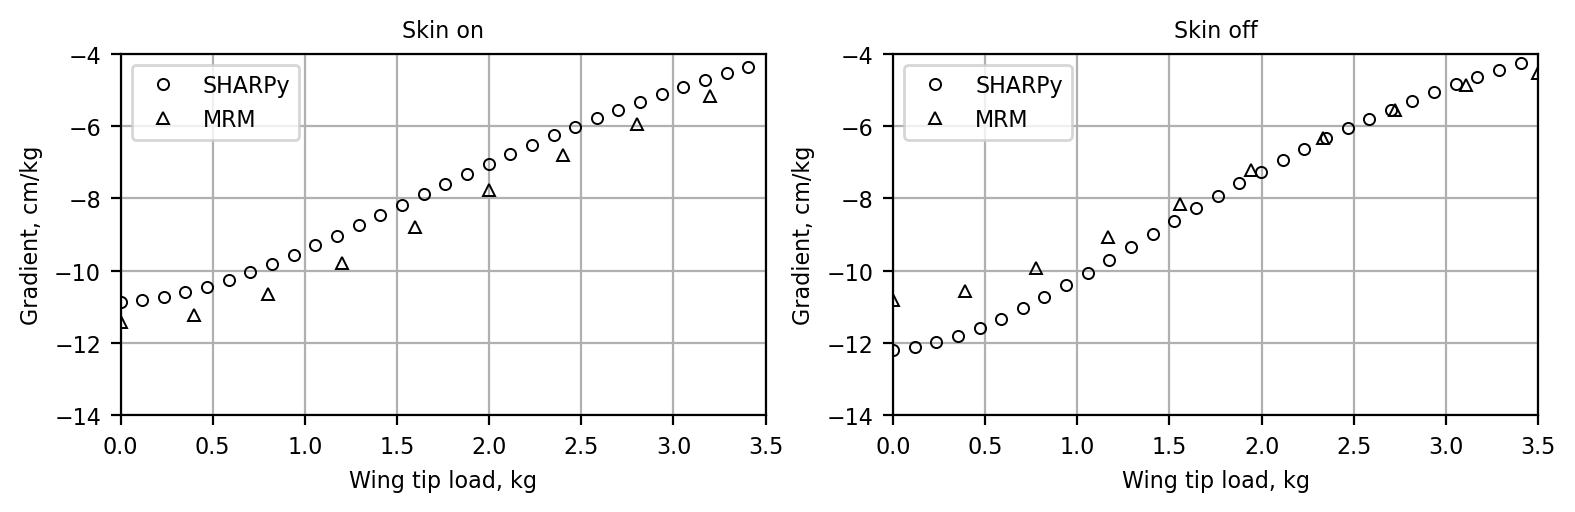

In [26]:
cm2in = 1/2.54
ar = 1.57
ar = 3
width_cm = 20

figsize = (width_cm * cm2in, width_cm / ar * cm2in)
fig, ax = plt.subplots(ncols=2, figsize=figsize)

for case in bending_results.values():
    if case['skin']:
        a = ax[0]
        a.set_title('Skin on')
    else:
        a = ax[1]   
        a.set_title('Skin off')
    
    if case['marker'] == '+':
        mfc = 'k'
    else:
        mfc = 'none'
    if case['label'] == 'Experimental':
        continue
    slope = instantaneous_slope(case['data'][:, 1], case['data'][:, 0])
    a.plot(case['data'][:, 0], 100 * slope, label=case['label'], marker=case['marker'], ms=case['s'], markeredgecolor='k', mfc=mfc, ls='none', 
           lw=0.5, color='k', markeredgewidth=0.7,
           **case.get('linestyle', {}))

for a in ax:
    a.legend(fontsize=8)
    a.set_xlabel('Wing tip load, kg')
    a.set_ylabel('Gradient, cm/kg')
    a.grid()
    a.set_xlim(0, 3.5)
    a.set_ylim(-14, -4)

    for item in ([a.title, a.xaxis.label, a.yaxis.label] +
             a.get_xticklabels() + a.get_yticklabels()):
        item.set_fontsize(8)

plt.tight_layout()
plt.savefig(output_figures_folder + '02_Bending_Slope.pdf')